# 세미나
## 헝가리안 알고리즘 설명 및 라벨 정렬

이 알고리즘은 1955년 H. W. Kuhn에 의해서 발표가 되었습니다. Kuhn은 헝가리 사람이 아닌 미국 사람입니다.

**한줄 요약:**

일대일 대응에서 중복없이 배분할 때, 최소(혹은 최대)의 비용으로 배분하는 작업







## 헝가리안 알고리즘

헝가리안 알고리즘은 아래의 4단계로 구성됩니다. 처음 두 단계는 한 번 실행되고 3단계와 4단계는 최적의 할당을 찾을 때까지 반복됩니다. 알고리즘의 Input은 마이너스 값이 아닌 요소만 있는 n x n 정방 행렬입니다.

+ 0단계: 최대 문제/ 최소 문제 결정
 
 최소 문제의 경우 계속 진행, 최대문제는 -1을 곱하고 음수가 없게 최대값을 더해줘서 마이너스 값이 아닌 요소만 있는 n x n 정방 행렬로 변경시켜줍니다.

+ 1단계: 행 최소값 빼기

  각 행에 대해 가장 작은 요소를 찾아 해당 행의 각 요소에서 뺍니다.

+ 2단계: 열 최소값 빼기

  마찬가지로 각 열에 대해 가장 작은 요소를 찾아 해당 열의 각 요소에서 뺍니다.

+ 3단계: 최소한의 라인 수로 모든 0을 덮습니다.

  최소한의 수평선과 수직선을 사용하여 결과 행렬의 모든 0을 덮습니다. n 라인이 필요한 경우 0 사이에 최적의 할당이 존재합니다 . 알고리즘이 중지됩니다.n 줄 미만 이 필요한 경우 4단계를 계속합니다.

+ 4단계: 추가 0 생성

  3단계에서 선으로 덮이지 않은 가장 작은 요소(k 라고 함)를 찾습니다. 덮이지 않은 모든 요소에서 k 를 빼고 두 번 덮인 모든 요소 에 k 를 더합니다.



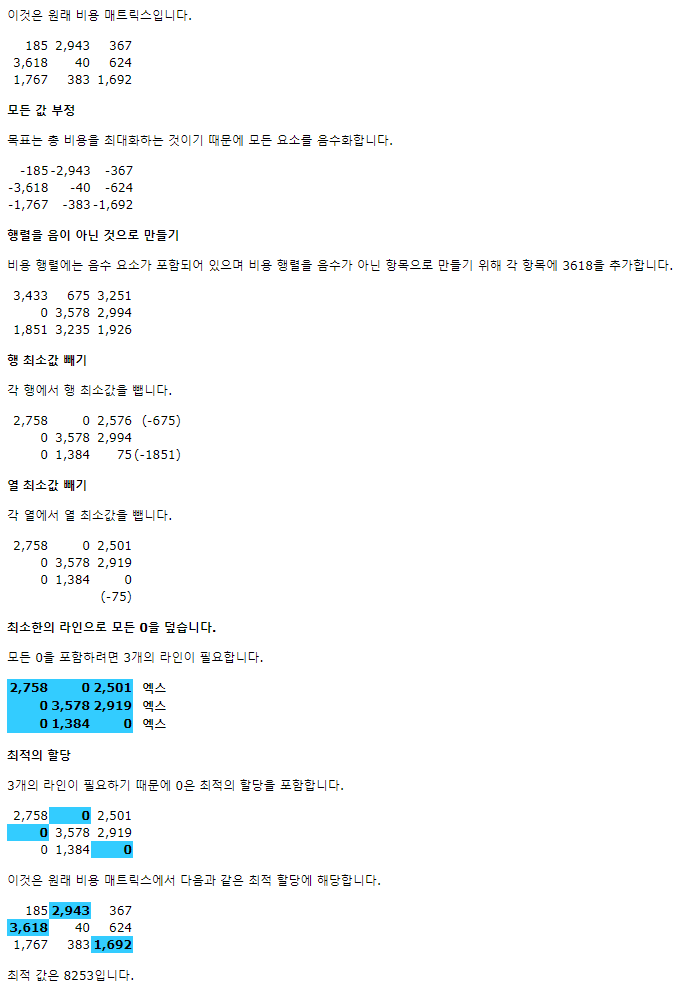

In [ ]:
from IPython.display import Image
Image("huu.png")

In [ ]:
# 먼크레스 라이브러리 설치
# 먼크레스는 헝가리안 알고리즘을 발전시킨 수학자, 이 사람도 미국사람이다.

!pip install munkres

In [ ]:
import numpy as np    
import pandas as pd     
from munkres import Munkres 

In [ ]:
class LabelArrange():
  def mapping_clustering(self,clt, mapper):
      return np.array([mapper[i] for i in clt])

  #cost matrix (pandas cross tab)
  def make_cost_matrix(self,dict_1, dict_2): 
      x1 = np.unique(dict_1)
      x2 = np.unique(dict_2)
      y1 = x1.size
      y2 = x2.size
      assert (y1 == y2 and np.all(x1 == x2))

      P = np.ones([y1, y2])
      for i in range(y1):
          it_i = np.nonzero(dict_1 == x1[i])[0]
          for j in range(y2):
              it_j = np.nonzero(dict_2 == x2[j])[0]
              P_ij = np.intersect1d(it_j, it_i)
              P[i, j] = -P_ij.size
      return P

  def arrange_labels(self, labels):
      munkres = Munkres()
      new_labels = {}
      for i in range(len(labels.keys())):
          if i == 0:
              new_labels[i] = labels[i]
          else:
              cost_matrix = self.make_cost_matrix(labels[i], labels[0])
              indexes = munkres.compute(cost_matrix)
              mapper = {old: new for (old, new) in indexes}
              new_labels[i] = self.translate_clustering(labels[i], mapper)
      return new_labels

In [ ]:
df = pd.read_excel("a.xlsx")
df

,file_name,label,enc_label,clustered_label
0,0000024230001_ohm.jpg,업라이트형,1,0
1,0000110360002_ohm.jpg,업라이트형,1,0
2,0000110360003_ohm.jpg,업라이트형,1,0
3,0000110360004_ohm.jpg,업라이트형,1,0
4,0000472460001_ohm.jpg,업라이트형,1,0
...,...,...,...,...
11614,R1996001439_gpt.jpg,휴대형,2,2
11615,R1996001440_gpt.jpg,휴대형,2,2
11616,R1996001441_gpt.jpg,휴대형,2,2
11617,R1997000433_gpt.jpg,휴대형,2,2


In [ ]:
pd.crosstab(np.array(df["label"]),np.array(df["clustered_label"]))

col_0,0,1,2
row_0,,,
업라이트형,2943,40,383
캐니스터형,185,3618,1767
휴대형,367,624,1692


In [ ]:
# enc_label
# {업라이트형 : 1, 캐니스터 : 0 , 휴대형 : 2 }

dicti = {0 : np.array(df["enc_label"]), 1:np.array(df["clustered_label"])}
dicti

{0: array([1, 1, 1, ..., 2, 2, 2]), 1: array([0, 0, 0, ..., 2, 2, 2])}

In [ ]:
la = LabelArrange()
m = Munkres()

In [ ]:
# cost matrix (pandas cross tab)
cost_matrix = la.make_cost_matrix(dicti[1],dicti[0])
cost_matrix

array([[ -185., -2943.,  -367.],
       [-3618.,   -40.,  -624.],
       [-1767.,  -383., -1692.]])

In [ ]:
indexes = m.compute(cost_matrix)
indexes

[(0, 1), (1, 0), (2, 2)]

In [ ]:
mapper = {old: new for (old, new) in indexes}
mapper

#0 → 1, 1 → 0, 2 → 2

{0: 1, 1: 0, 2: 2}

## {0: 1, 1: 0, 2: 2}

## clustered_label의 0 →  1로 변경,

## clustered_label의 1 →  0로 변경, 

## clustered_label의 2 →  2로 변경



In [ ]:
new_labels=[]
for i in dicti[1]:
  new_labels.append(mapper[i])

new_labels = np.array(new_labels)

In [ ]:
print(dicti[1][0:30])
print(new_labels[0:30])

[0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0]
[1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1]


## 먼저 정의해둔 {업라이트형 : 1, 캐니스터 : 0 , 휴대형 : 2 }

## clustered_label의 1의 대표값은 업라이트형

## clustered_label의 0의 대표값은 캐니스터형

## clustered_label의 2의 대표값은 휴대형